# Simple example using Celery field

Creates half-hourly footprint image files centered on tower location.

In [1]:
from IPython.display import IFrame

IFrame(src='./celery_windrose_7_2_through_7_4.html', width=700, height=600)


# Import libraries

In [1]:
import sys
# local relative path
sys.path.append("../../scripts/") 

import ffp
import pandas as pd
import numpy as np

# Read in data and create datetimes for saving footprints

In [2]:
import sys
# local relative path
sys.path.append("../../scripts/") 

import ffp
import pandas as pd
df = pd.read_csv('FP_Celery.csv')
m = dict(yyyy='year', mm='month', day='day', HH_UTC='hour', MM='minute')
v = df.iloc[:, :5].rename(columns=m)
v['second'] = 0
df.index = pd.to_datetime(v)
df.index.name = 'date'
df.drop(m.keys(), axis= 1, inplace=True)
df.head()

index = pd.to_datetime("2019-07-03 10:30:00")
tmp = df.loc[index,:].astype(float)
dx = 100

,zm,d,z0,u_mean,L,sigma_v,u_star,wind_dir,h_canopy,h_Measurement,z_Aerodynamic_Height
date,,,,,,,,,,,
2019-07-02 00:00:00,1.6,0.35587,0.015351,3.997896,213.0273,0.599250,0.346788,19.75525,0.1,1.6,1.24413
2019-07-02 00:30:00,1.6,0.35587,0.016223,3.658556,191.146,0.583704,0.320958,25.16525,0.1,1.6,1.24413
2019-07-02 01:00:00,1.6,0.35587,0.015078,4.098290,201.4329,0.645444,0.354050,28.53543,0.1,1.6,1.24413
2019-07-02 01:30:00,1.6,0.35587,0.015078,2.932211,106.9871,0.671792,0.267674,27.74997,0.1,1.6,1.24413
2019-07-02 02:00:00,1.6,0.35587,0.015078,1.711630,25.08041,0.373173,0.148893,18.52890,0.1,1.6,1.24413


In [3]:
# not used here but could be used to create georeferenced rasters as in AmeriFlux example
lat,long = 36.438847, -121.373706

In [4]:

index = pd.to_datetime("2019-07-03 10:30:00")
tmp = df.loc[index,:].astype(float)
dx = 100


Alert(0017):
 Only one value of zm passed. Using it for all footprints.
 Execution continues.

Alert(0013):
 Using z0, ignoring umean if passed.
 Execution continues.

Calculating footprint  1  of  1


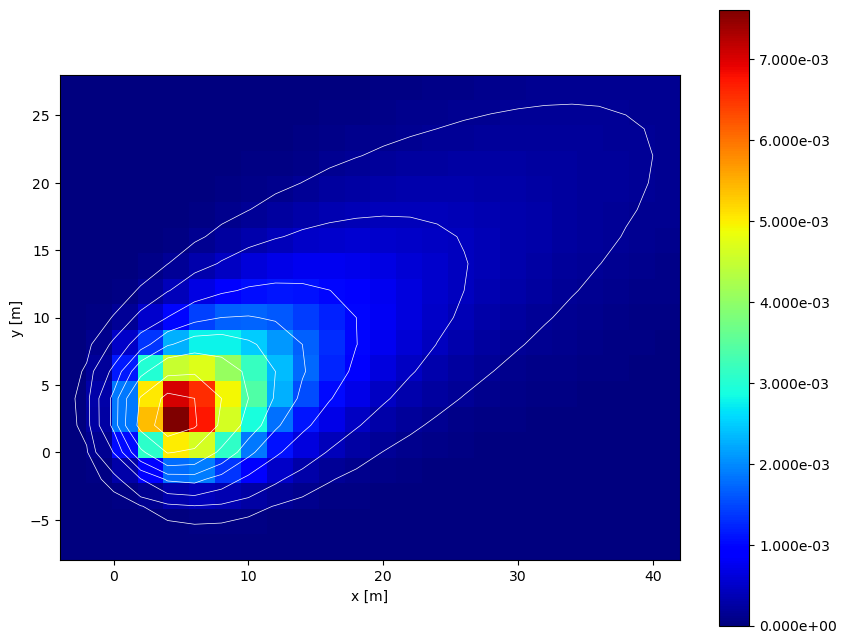

In [5]:
import calc_footprint_FFP

ffpobj = calc_footprint_FFP.ffp_climatology(
        zm=tmp.zm - tmp.d,
        z0=tmp.z0,
        umean=tmp.u_mean,
        h=2000,
        ol=tmp.L,
        sigmav=tmp.sigma_v,
        ustar=tmp.u_star,
        wind_dir=tmp.wind_dir,
        fig=True,
        dx=dx,
        dy=dx,
        crop=True,
   )


Alert(0017):
 Only one value of zm passed. Using it for all footprints.
 Execution continues.

Alert(0013):
 Using z0, ignoring umean if passed.
 Execution continues.

Calculating footprint  1  of  1


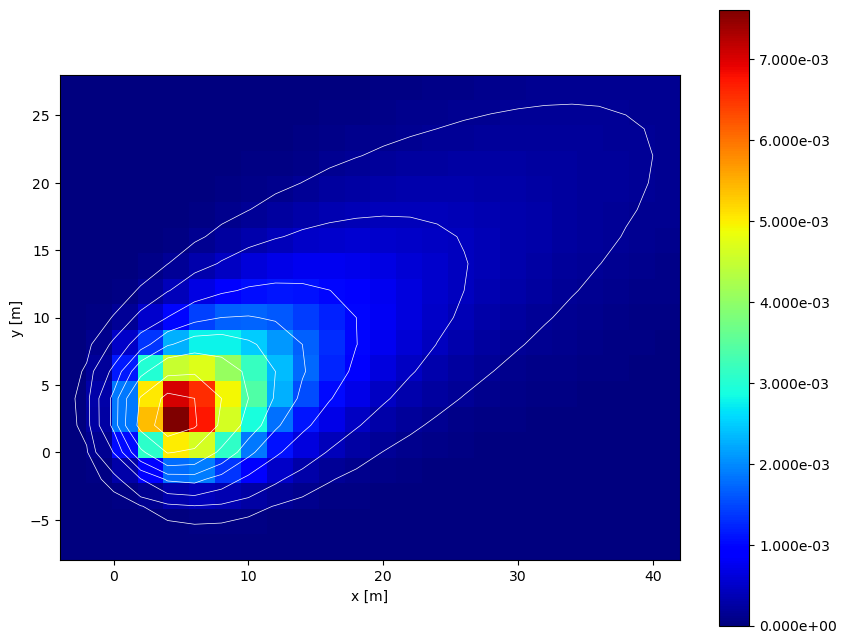

In [1]:
import ffp2
import sys
# local relative path
sys.path.append("../../scripts/") 

import ffp
import pandas as pd
df = pd.read_csv('FP_Celery.csv')
m = dict(yyyy='year', mm='month', day='day', HH_UTC='hour', MM='minute')
v = df.iloc[:, :5].rename(columns=m)
v['second'] = 0
df.index = pd.to_datetime(v)
df.index.name = 'date'
df.drop(m.keys(), axis= 1, inplace=True)
df.head()

index = pd.to_datetime("2019-07-03 10:30:00")
tmp = df.loc[index,:].astype(float)
dx = 100

ffpobj = ffp2.ffp_climatology(
        zm=tmp.zm - tmp.d,
        z0=tmp.z0,
        umean=tmp.u_mean,
        h=2000,
        ol=tmp.L,
        sigmav=tmp.sigma_v,
        ustar=tmp.u_star,
        wind_dir=tmp.wind_dir,
        fig=True,
        dx=100,
        dy=100,
        crop=True,
    )

# Calculate footprint images

Assumes boundary layer height of 2 km. The footprints in this example are only calculated for hours between 7 AM and 8 PM, this alongwith footprint array domain, resolution, and other options are all easily adjustable using the arguments to the Kljun et al. footprint function.

In [2]:
tmp.name

Timestamp('2019-07-03 10:30:00')

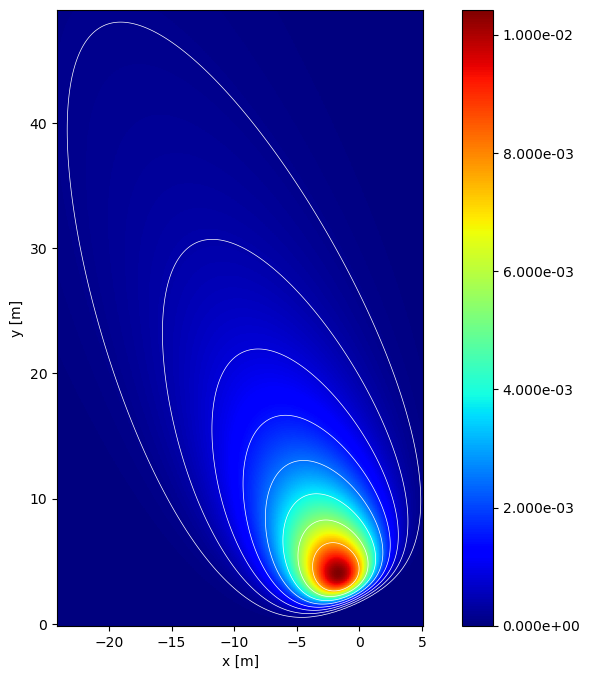

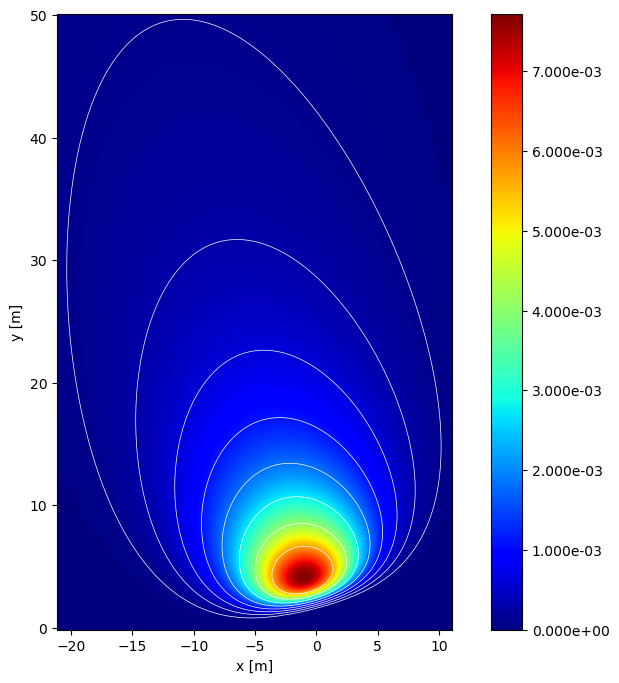

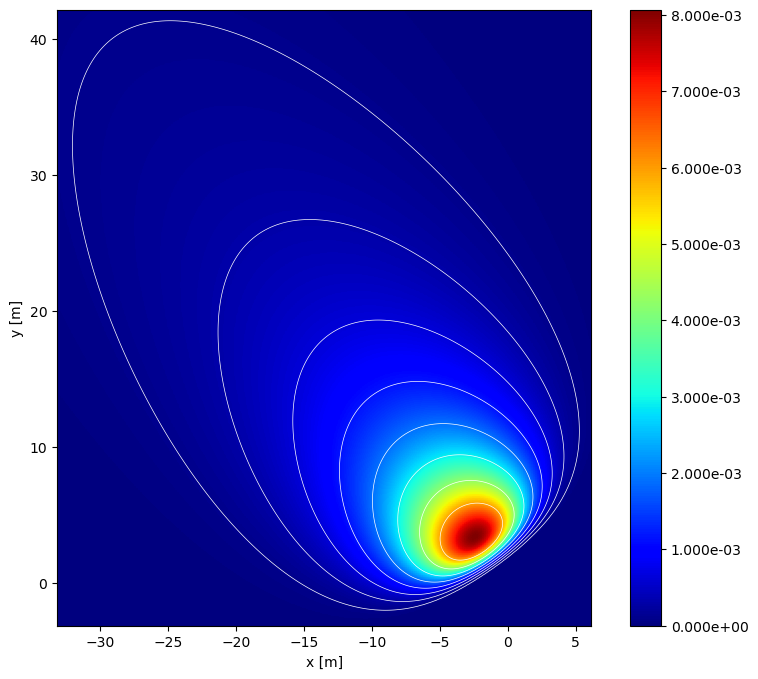

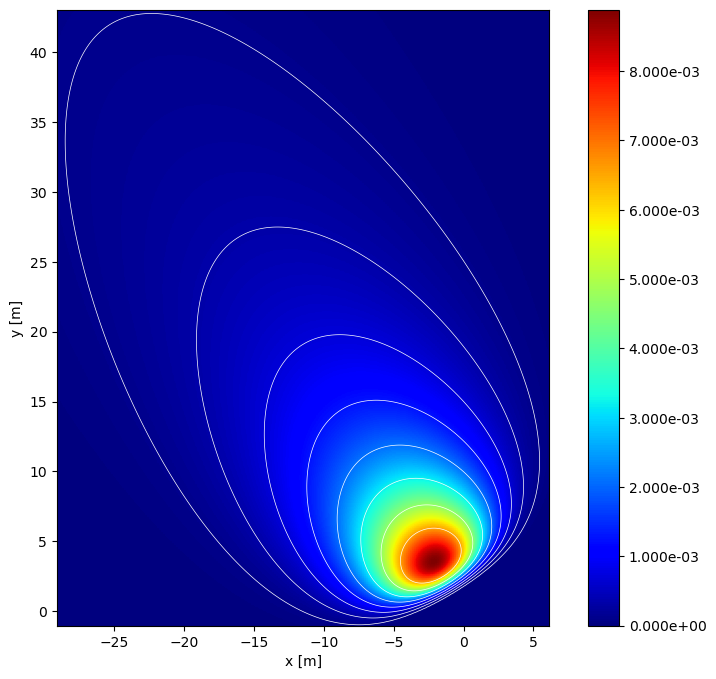

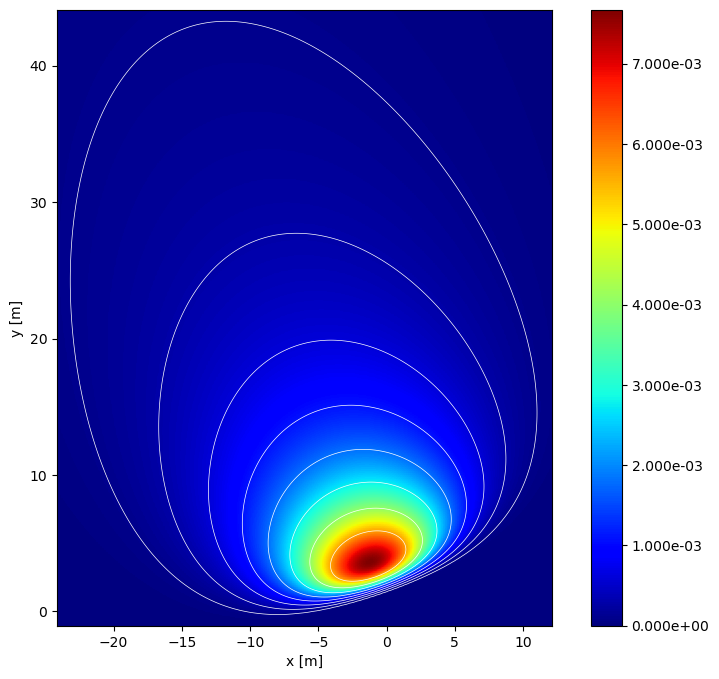

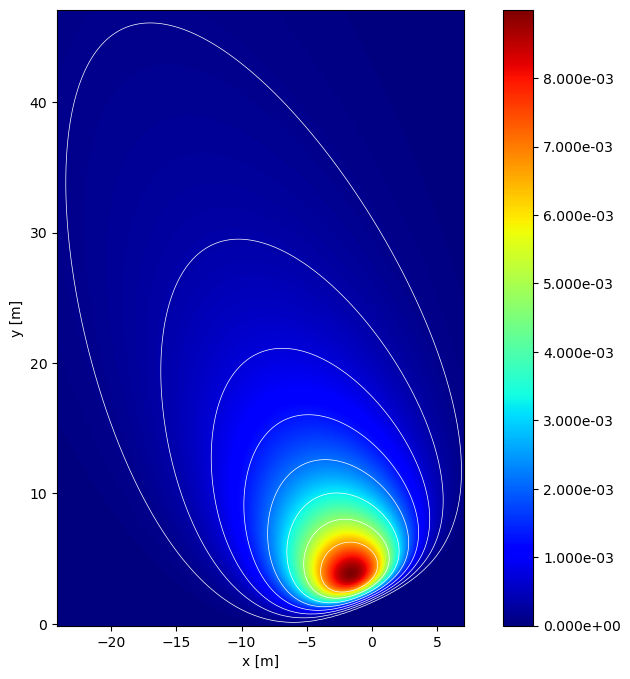

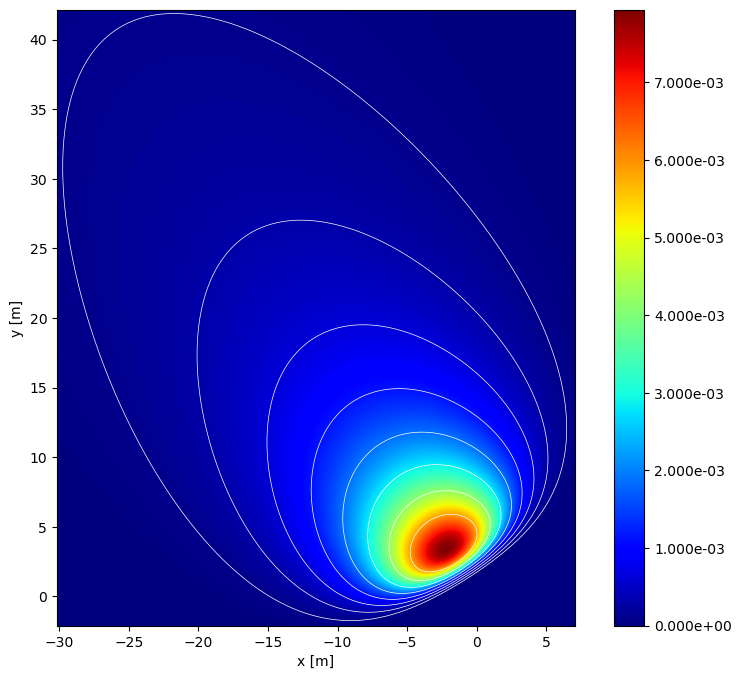

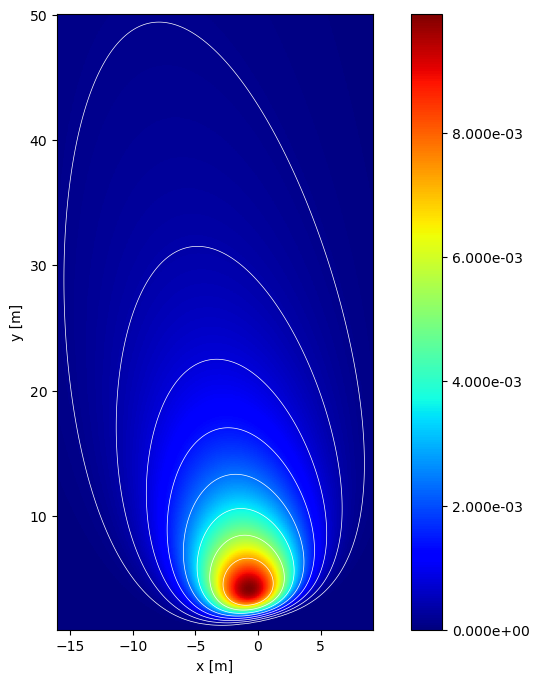

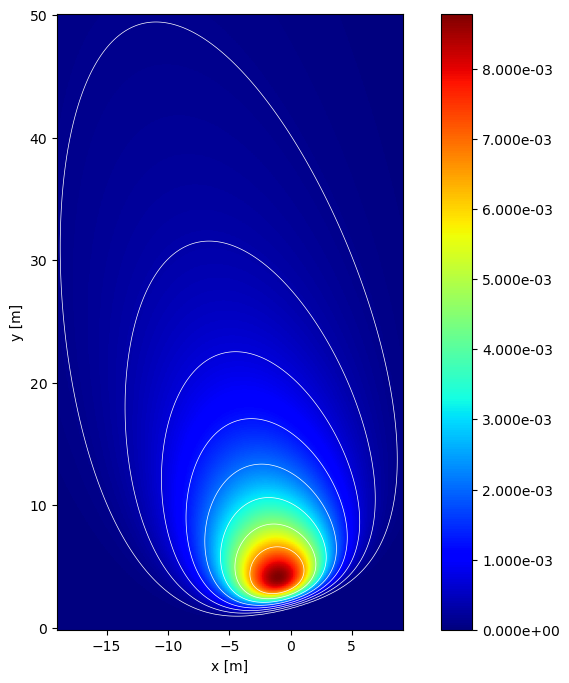

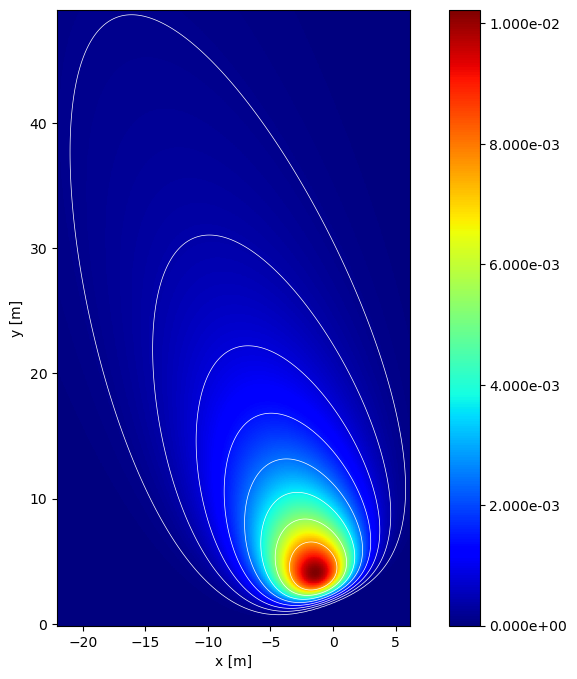

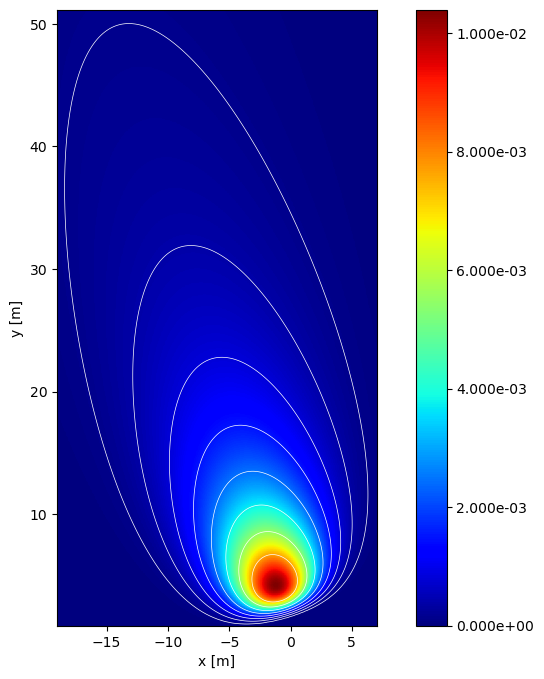

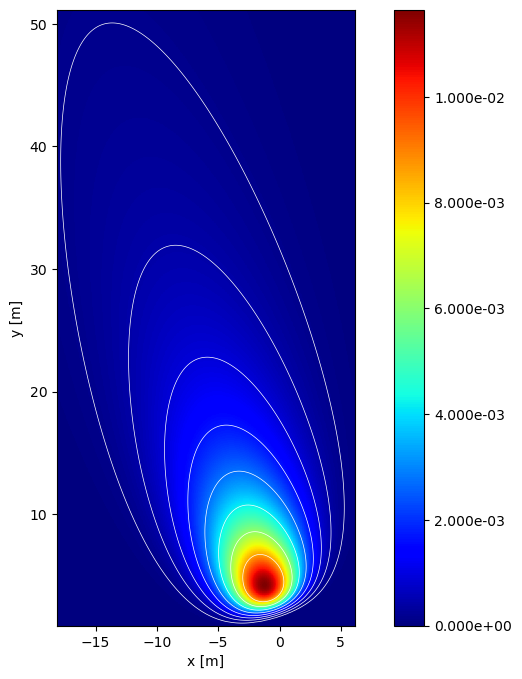

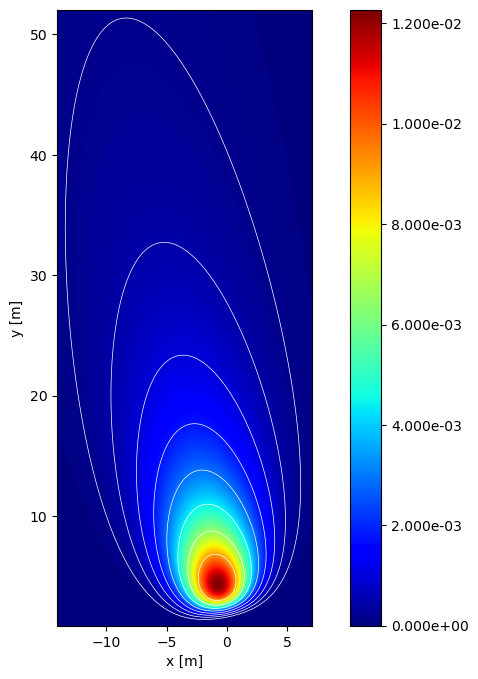

In [3]:
# domain parameters
origin_d = 75.
dx = 3.
# only doing 2 days half hourly
for i, index in enumerate(df.loc['7/4/2019 08:00':'7/4/2019 14:00'].index):
    tmp = df.loc[index,:].astype(float)
    r = ffp2.ffp_climatology(
        zm=tmp.zm - tmp.d,
        z0=tmp.z0,
        umean=tmp.u_mean,
        h=2000,
        ol=tmp.L,
        sigmav=tmp.sigma_v,
        ustar=tmp.u_star,
        wind_dir=tmp.wind_dir,
        fig=True,
        domain=[-origin_d,origin_d,-origin_d,origin_d],
        dx=dx,
        dy=dx,
        crop=True,
        verbosity=1
    )
    fig = r.output.get('fig')
    if fig:
        fig.savefig(f'{tmp.name:%Y%m%d_%H%M}.png')
       

# View an example footprint image

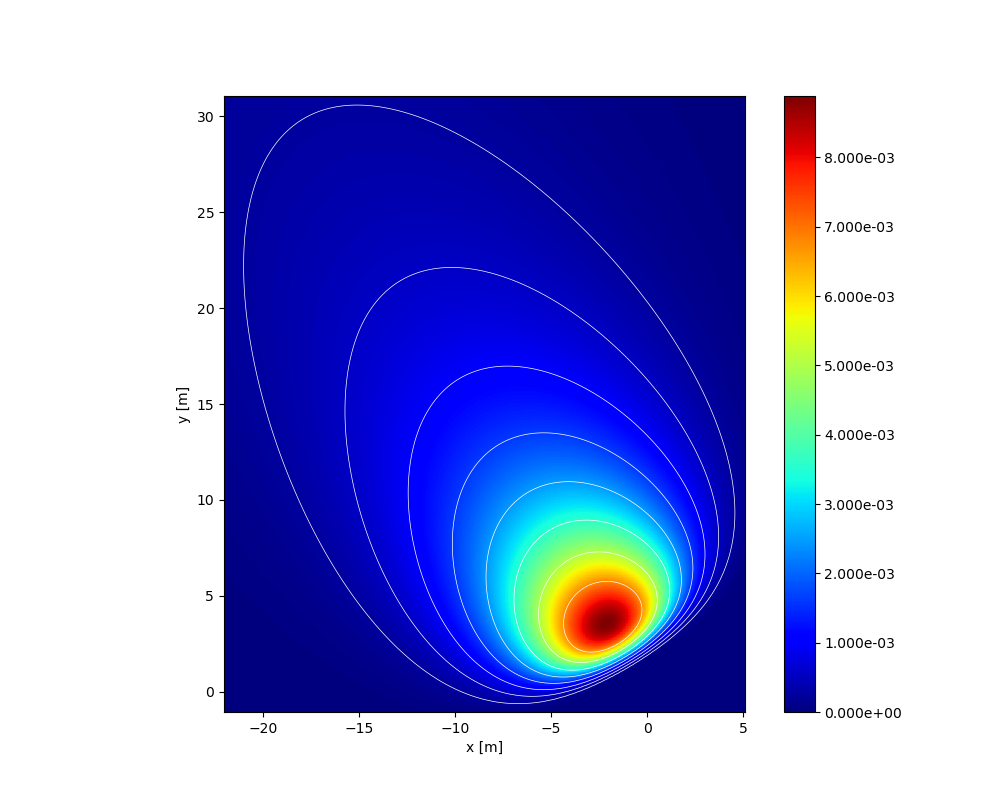

In [12]:
from IPython.display import Image
Image('./20190704_0930.png') 